Name: Priyasmita Das  
Roll: 2206284   
Section: IT-06   
Github repo link: https://github.com/priyasmitaaa/ML_logistic_regression

# LOGISTIC REGRESSION ASSIGNMENT

Q1. Use logistic regression to find the decision boundary for the given dataset. Set your learning rate to 0.1. What is the cost function value and learning parameter value after convergence?

In [6]:
import numpy as np
import pandas as pd

# Importing feature and label data
features = pd.read_csv("logisticX.csv").values
labels = pd.read_csv("logisticY.csv").values

# Standardizing features to have zero mean and unit variance
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# Inserting bias term (intercept) as the first column
features = np.hstack([np.ones((features.shape[0], 1)), features])  # shape: (samples, features+1)

# Sigmoid activation function
def activation_fn(z):
    return 1 / (1 + np.exp(-z))

# Loss calculation using logistic regression cross-entropy formula
def calculate_loss(X, y, weights):
    m = len(y)
    predictions = activation_fn(X @ weights)
    epsilon = 1e-5  # Prevents log(0)
    loss = (-1 / m) * (y.T @ np.log(predictions + epsilon) + (1 - y).T @ np.log(1 - predictions + epsilon))
    return loss

# Optimization routine using gradient-based update rule
def optimize_weights(X, y, lr=0.1, max_iter=1000, threshold=1e-6):
    m, n = X.shape
    weights = np.zeros((n, 1))
    loss_values = []

    for i in range(max_iter):
        preds = activation_fn(X @ weights)
        grad = (1 / m) * (X.T @ (preds - y))
        weights -= lr * grad

        current_loss = calculate_loss(X, y, weights)
        loss_values.append(current_loss[0][0])

        # Check for convergence based on minimal loss change
        if i > 0 and abs(loss_values[-2] - loss_values[-1]) < threshold:
            print(f"Optimization stopped at iteration {i}")
            break

    return weights, loss_values

# Training the logistic regression model
final_weights, loss_curve = optimize_weights(features, labels, lr=0.1)

# Displaying results
print("Final loss:", loss_curve[-1])
print("Trained model parameters:\n", final_weights)


Final loss: 0.22612383169703448
Trained model parameters:
 [[ 0.38193936]
 [ 2.35449296]
 [-2.53913828]]


Q2. Plot cost function vs iteration graph for the model trained in Question 1.

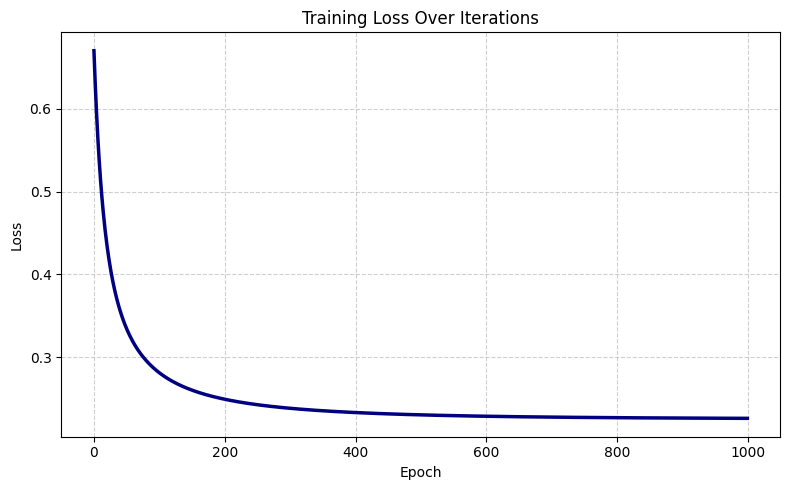

In [7]:
import matplotlib.pyplot as plt

# Visualizing the loss progression over training steps
def visualize_training_loss(loss_values):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(loss_values)), loss_values, color='navy', linewidth=2.5)
    plt.title('Training Loss Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Display the training loss curve
visualize_training_loss(loss_curve)


Q3. Plot the given dataset on a graph, use different colors for different classes and also show the decision boundary you obtained in Question 1.
Do not use scatter plot.

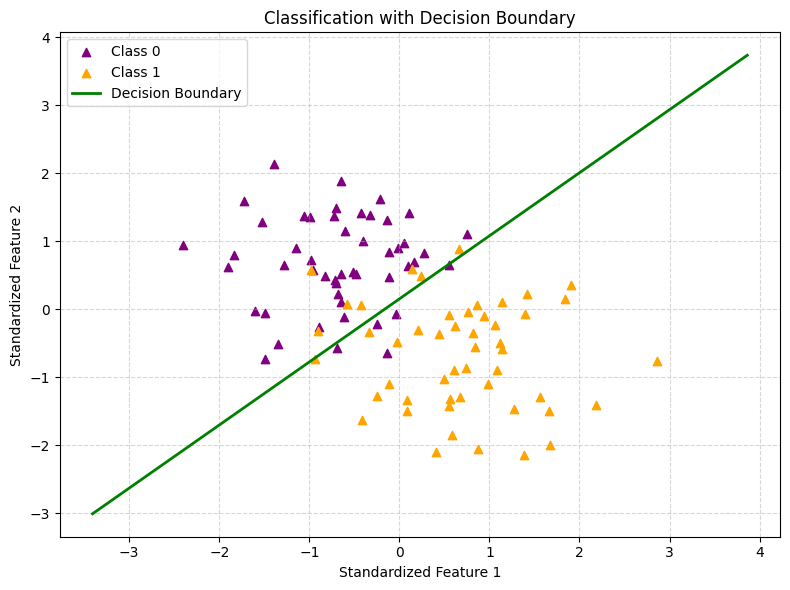

In [8]:
def display_decision_surface(features, labels, weights):
    plt.figure(figsize=(8, 6))

    # Extracting normalized features
    x1 = features[:, 1]
    x2 = features[:, 2]
    labels_flat = labels.ravel()

    # Visual marker plotting for each class without connecting lines
    plotted_class_0 = False
    plotted_class_1 = False

    for i in range(len(labels_flat)):
        point_color = 'purple' if labels_flat[i] == 0 else 'orange'
        label_name = None

        if labels_flat[i] == 0 and not plotted_class_0:
            label_name = 'Class 0'
            plotted_class_0 = True
        elif labels_flat[i] == 1 and not plotted_class_1:
            label_name = 'Class 1'
            plotted_class_1 = True

        plt.scatter(x1[i], x2[i], c=point_color, marker='^', label=label_name)

    # Calculating decision boundary line: theta0 + theta1*x1 + theta2*x2 = 0
    x_range = np.linspace(min(x1) - 1, max(x1) + 1, 100)
    boundary_line = -(weights[0] + weights[1] * x_range) / weights[2]

    plt.plot(x_range, boundary_line, color='green', linewidth=2, label='Decision Boundary')

    plt.title('Classification with Decision Boundary')
    plt.xlabel('Standardized Feature 1')
    plt.ylabel('Standardized Feature 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Call the modified function
display_decision_surface(X, y, theta_final)


Q4.Train your model with a learning rate of 0.1 and 5. Plot the cost-function vs iteration curve for both learning rates on the same graph.
Only train your model for 100 iterations.

In [9]:
def run_gradient_optimization(data, targets, learning_rate, steps=100):
    samples, features = data.shape
    weights = np.zeros((features, 1))
    history = []

    for _ in range(steps):
        predictions = sigmoid(data @ weights)
        updates = (1 / samples) * (data.T @ (predictions - targets))
        weights -= learning_rate * updates
        loss = compute_cost(data, targets, weights)
        history.append(loss[0][0])

    return weights, history


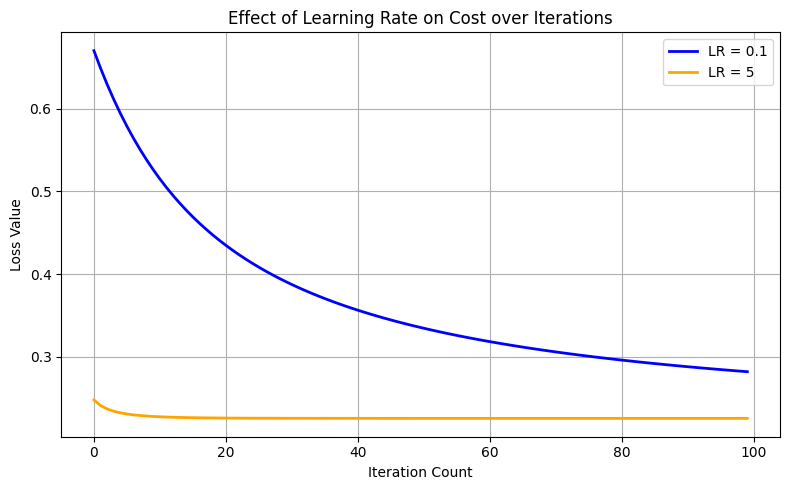

In [10]:
# Running gradient descent with two different learning rates
_, loss_history_01 = run_gradient_optimization(X, y, learning_rate=0.1, steps=100)
_, loss_history_5  = run_gradient_optimization(X, y, learning_rate=5,   steps=100)

# Function to visualize cost trends for both learning rates
def compare_learning_rate_effects(loss1, loss2, tag1='LR = 0.1', tag2='LR = 5'):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(loss1)), loss1, label=tag1, color='blue', linewidth=2)
    plt.plot(range(len(loss2)), loss2, label=tag2, color='orange', linewidth=2)
    plt.title('Effect of Learning Rate on Cost over Iterations')
    plt.xlabel('Iteration Count')
    plt.ylabel('Loss Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Displaying the plot
compare_learning_rate_effects(loss_history_01, loss_history_5)


Q5.Find the confusion matrix for your training dataset.
Using the confusion matrix, calculate:

Accuracy

Precision

Recall

F1-Score



In [11]:
# Generate predictions using final weights
def make_predictions(X, weights):
    probabilities = sigmoid(X @ weights)
    return (probabilities >= 0.5).astype(int)

# Function to compute and display performance metrics
def assess_model(X, y, weights):
    predictions = make_predictions(X, weights)
    actual = y.flatten()
    predicted = predictions.flatten()

    true_positive  = np.sum((actual == 1) & (predicted == 1))
    true_negative  = np.sum((actual == 0) & (predicted == 0))
    false_positive = np.sum((actual == 0) & (predicted == 1))
    false_negative = np.sum((actual == 1) & (predicted == 0))

    acc  = (true_positive + true_negative) / len(actual)
    prec = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    rec  = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1   = (2 * prec * rec) / (prec + rec) if (prec + rec) != 0 else 0

    print("Confusion Matrix:")
    print(f"TP: {true_positive}  FP: {false_positive}")
    print(f"FN: {false_negative}  TN: {true_negative}\n")

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")

# Run the evaluation
assess_model(X, y, theta_final)


Confusion Matrix:
TP: 43  FP: 5
FN: 7  TN: 44

Accuracy:  0.8788
Precision: 0.8958
Recall:    0.8600
F1-Score:  0.8776
